## Language Detection Model Creation
+ using naive bayes classification


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import joblib
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#pip install -U scikit-learn
import sklearn
sklearn.__version__
#1.0.2


'1.0.2'

In [4]:
data=pd.read_csv("Datasets\LanguageDetection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [5]:
data.shape

(10337, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
len(data[data.duplicated()])

66

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(10271, 2)

In [11]:
data["Language"].nunique()

17

In [12]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

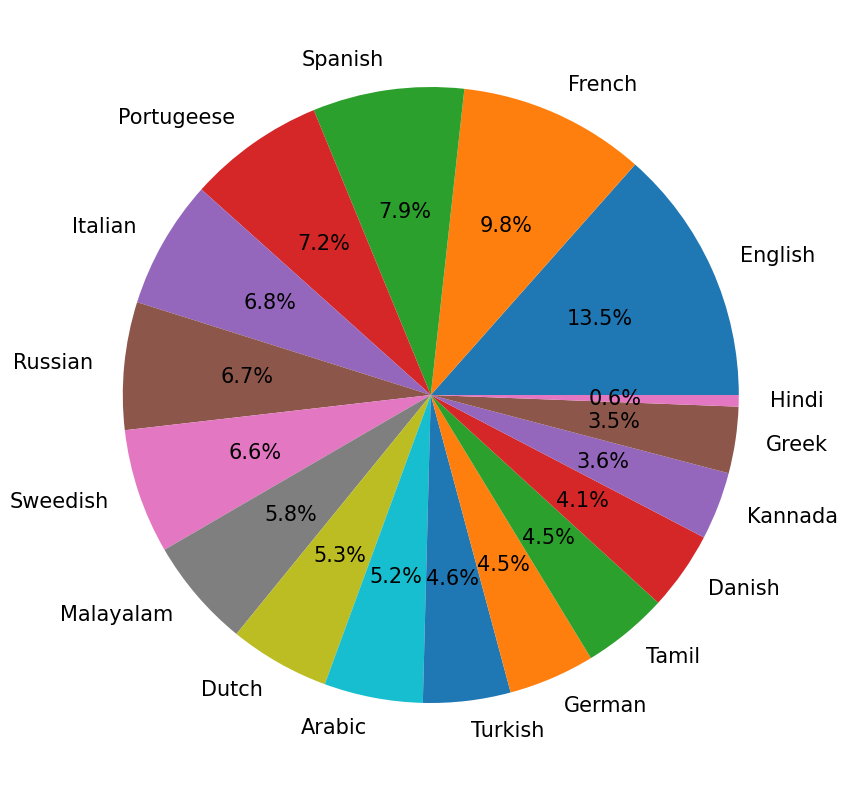

In [13]:
language = data["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [14]:
data1 = data.copy()
data1["cleaned_Text"] = ""
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [15]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags

  return Text 

In [16]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [17]:
X = data1["cleaned_Text"]
y = data1["Language"]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
pipe_lr1 = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])

In [21]:
pipe_lr1.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [22]:
pipe_lr1

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [23]:
#from sklearn.metrics import accuracy_score, confusion_matrix
pipe_lr1.score(X_test,y_test)

0.9774143302180686

In [24]:
ex =  "أنا أحب زكا وفريقها الرائع"

In [25]:
pipe_lr1.predict([ex])

array(['Arabic'], dtype='<U10')

In [26]:

pipeline_file1 = open("ML_Models\Language_detection_model","wb")
joblib.dump(pipe_lr1,pipeline_file1)
pipeline_file1.close()

+ def prediction(text):
    text = [text]
    return pipe_lr1.predict(text)[0]


In [27]:
language_dec = joblib.load(open("ML_Models\Language_detection_model", "rb"))
def Detect_The_lang(text):
    text = [text]
    result = language_dec.predict(text)[0]
    return result


In [28]:
Detect_The_lang("The man is green")

'English'